# Installing dependencies

In [2]:
!pip install torch torchvision


[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<b>Downloading the yolov5 repository</b>

In [3]:
import os
PATH=os.path.join("D:/","yolov5/","YOLO/")
!git clone https://github.com/ultralytics/yolov5 {PATH}


fatal: destination path 'D:/yolov5/YOLO' already exists and is not an empty directory.


In [4]:
#Installing the requirements
%cd {PATH}
!pip install -r requirements.txt

D:\yolov5\YOLO


[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
#Loading a pretrained model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\rakti/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-12-3 Python-3.9.12 torch-1.12.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [25]:
#Detecting objects from webcam feed
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Building the glasses detection model by fine tuning YOLO

In [5]:
import uuid
import time

In [36]:
IMAGES_PATH=os.path.join("D:/","yolov5/","data/","images")
labels=["glasses","no_glasses"]
num_images=16

<b>Collecting sample images from webcam for training</b>

In [37]:
cap = cv2.VideoCapture(0)
for label in labels:
    print(f"Sampling for {label}")
    time.sleep(5)
    
    for i in range(num_images):
        print(f'Collecting images for {label}, image number {i+1}')
        
        ret, frame = cap.read()
        
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        cv2.imwrite(imgname, frame)
        
        cv2.imshow('Image Collection', frame)
        
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

Sampling for glasses
Sampling for no_glasses


In [38]:
labelimg_path=os.path.join("D:/","yolov5/","YOLO/","labelimg")

In [15]:
!git clone https://github.com/tzutalin/labelImg {labelimg_path}

Cloning into '{LABELIMG_PATH}'...
Updating files:  41% (49/117)
Updating files:  42% (50/117)
Updating files:  43% (51/117)
Updating files:  44% (52/117)
Updating files:  45% (53/117)
Updating files:  46% (54/117)
Updating files:  47% (55/117)
Updating files:  48% (57/117)
Updating files:  49% (58/117)
Updating files:  50% (59/117)
Updating files:  51% (60/117)
Updating files:  52% (61/117)
Updating files:  53% (63/117)
Updating files:  54% (64/117)
Updating files:  55% (65/117)
Updating files:  56% (66/117)
Updating files:  57% (67/117)
Updating files:  58% (68/117)
Updating files:  59% (70/117)
Updating files:  60% (71/117)
Updating files:  61% (72/117)
Updating files:  62% (73/117)
Updating files:  63% (74/117)
Updating files:  64% (75/117)
Updating files:  65% (77/117)
Updating files:  66% (78/117)
Updating files:  67% (79/117)
Updating files:  68% (80/117)
Updating files:  69% (81/117)
Updating files:  70% (82/117)
Updating files:  71% (84/117)
Updating files:  72% (85/117)
Updati

<b>Installing "labelimg" to tag the images with labels and save them as the coordinate of the object, its width and height</b>

In [39]:
%cd {LABELIMG_PATH}
!pyrcc5 -o libs/resources.py resources.qrc

D:\yolov5\YOLO\{LABELIMG_PATH}


In [40]:
!python labelImg.py

Image:D:\yolov5\data\images\glasses.4a90e61a-7554-11ed-a65a-010101010000.jpg -> Annotation:D:/yolov5/data/labels\glasses.4a90e61a-7554-11ed-a65a-010101010000.txt

D:\yolov5\YOLO\{LABELIMG_PATH}\labelImg.py:213: DeprecationWarning: an integer is required (got type DockWidgetFeatures).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  self.dock.setFeatures(self.dock.features() ^ self.dock_features)



Image:D:\yolov5\data\images\glasses.4bc6b2f5-7554-11ed-85c3-010101010000.jpg -> Annotation:D:/yolov5/data/labels\glasses.4bc6b2f5-7554-11ed-85c3-010101010000.txt
Image:D:\yolov5\data\images\glasses.4cff9439-7554-11ed-8cf7-010101010000.jpg -> Annotation:D:/yolov5/data/labels\glasses.4cff9439-7554-11ed-8cf7-010101010000.txt
Image:D:\yolov5\data\images\glasses.4e35a73f-7554-11ed-9975-010101010000.jpg -> Annotation:D:/yolov5/data/labels\glasses.4e35a73f-7554-11ed-9975-010101010000.txt
Image:D:\yolov5\data\images\glasses.4f6ba16e-7554-11ed-89c9-010101010000.jpg -> Annotation:D:/yolov5/data/labels\glasses.4f6ba16e-7554-11ed-89c9-010101010000.txt
Image:D:\yolov5\data\images\glasses.45b9e56f-7554-11ed-9b0b-010101010000.jpg -> Annotation:D:/yolov5/data/labels\glasses.45b9e56f-7554-11ed-9b0b-010101010000.txt
Image:D:\yolov5\data\images\glasses.46ee39e6-7554-11ed-969d-010101010000.jpg -> Annotation:D:/yolov5/data/labels\glasses.46ee39e6-7554-11ed-969d-010101010000.txt
Image:D:\yolov5\data\images

In [41]:
pth=os.path.join("D:/","yolov5","YOLO")
%cd {pth}

D:\yolov5\YOLO


Training the model with 320*320 input size for 500 epochs

In [42]:
 !python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  v7.0-23-g5dc1ce4 Python-3.9.12 torch-1.12.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv

In [43]:
#Loading the model for prediction
model=torch.hub.load('ultralytics/yolov5','custom',path="D:/yolov5/YOLO/runs/train/exp/weights/best.pt")

Using cache found in C:\Users\rakti/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-12-3 Python-3.9.12 torch-1.12.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [73]:
#Sample images
img1=os.path.join("C:/Users/rakti/OneDrive/Pictures//Screenshots/Screenshot (850).png")
img2=os.path.join("C:/Users/rakti/OneDrive/Pictures//Screenshots/Screenshot (849).png")

In [74]:
result1=model(img1)
result2=model(img2)

In [69]:
result.print()

image 1/1: 429x588 1 glasses
Speed: 19.7ms pre-process, 423.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


<h4>Visualise the results</h4>

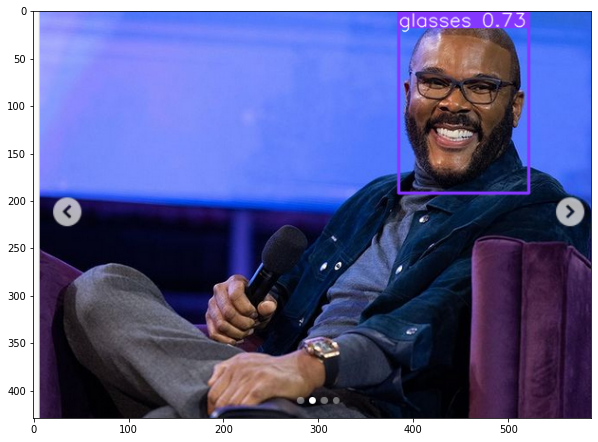

In [75]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.imshow(np.squeeze(result1.render()))

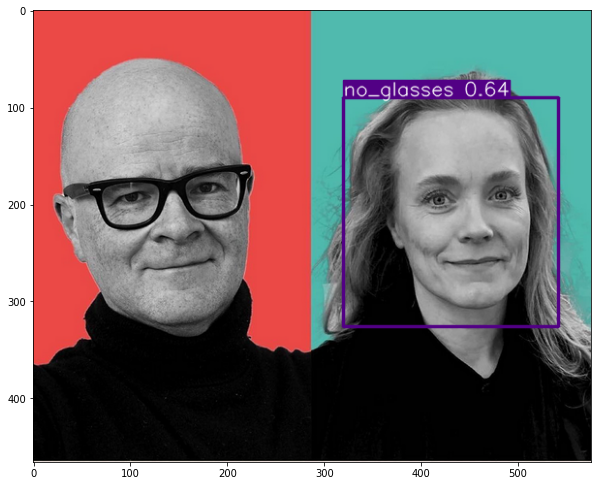

In [76]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.imshow(np.squeeze(result2.render()))

The man's face not being detected could be due to the fact that he's bald, and the model was trained on faces with hair.